## Import required packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office. We have to forecast the sales of the products for the next 6 months, so that we can have a proper estimate and can plan our inventory and business processes accordingly. 

## Import time series data: Global Superstore Data

In [2]:
#Read the data
data = pd.read_csv('Global+Superstore+Data.csv')
data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [3]:
# Check the shape of data
data.shape

(51290, 5)

In [4]:
# Get the Month and Year from the Order date.
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.to_period('M')
data

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-05,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-05,Consumer,Africa,2832.960,311.5200
...,...,...,...,...,...
51285,2014-06,Corporate,APAC,65.100,4.5000
51286,2014-06,Consumer,US,0.444,-1.1100
51287,2013-02,Home Office,US,22.920,11.2308
51288,2012-02,Home Office,LATAM,13.440,2.4000


In [5]:
# Make new column by combining market and segment column
data['Market Segment'] = data['Market'].str.cat(data['Segment'], sep ="-")
data.drop(['Market','Segment'], inplace=True, axis=1)

### 21 unique Market Segments

In [6]:
data['Market Segment'].unique()

array(['US-Consumer', 'APAC-Corporate', 'APAC-Consumer', 'EU-Home Office',
       'Africa-Consumer', 'US-Corporate', 'EMEA-Consumer',
       'LATAM-Home Office', 'EU-Corporate', 'EMEA-Corporate',
       'LATAM-Consumer', 'EU-Consumer', 'US-Home Office',
       'LATAM-Corporate', 'Africa-Corporate', 'APAC-Home Office',
       'EMEA-Home Office', 'Africa-Home Office', 'Canada-Corporate',
       'Canada-Home Office', 'Canada-Consumer'], dtype=object)

In [7]:
# Sum the profit of all Market Segment
datag = data.pivot_table(index = 'Order Date', values = 'Profit', columns = 'Market Segment', aggfunc = sum)
datag.head()

Market Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


#### Dividing the data in train-test for calculating COV Values

In [8]:
train_len = 42
train_datag = datag[0:train_len] # first 42 months as training set
test_datag = datag[train_len:]

### Calculating COV Value

In [9]:
# Creating a new Dataframe for COV on the Pofit
cov = pd.DataFrame(columns = ['Profit','cov'])
cov

,Profit,cov


In [10]:
# Calculating COV value
for i in train_datag.columns:
    temp = {'Profit' : i , "cov" : np.std(train_datag[i]/np.mean(train_datag[i]))}
    cov = cov.append(temp, ignore_index = True)
 

In [11]:
# Sorting for determining most profiatble market segment
cov.sort_values(by = 'cov')

,Profit,cov
0,APAC-Consumer,0.522725
1,APAC-Corporate,0.530051
12,EU-Consumer,0.595215
15,LATAM-Consumer,0.683770
13,EU-Corporate,0.722076
16,LATAM-Corporate,0.882177
14,EU-Home Office,0.938072
2,APAC-Home Office,1.008219
18,US-Consumer,1.010530
19,US-Corporate,1.071829


#### After sorting we get the most profitable segment to be 'APAC-Consumer' as it has the lowest COV value.
####  So we can either drop all the other segment or simply create a new dataframe only for this Market Segment. We are creating a new Dataframe here

In [12]:
# Creating new DF having only APAX-Consumer Market Segment
data1 = data.loc[data['Market Segment'] == 'APAC-Consumer']
data1.head()

,Order Date,Sales,Profit,Market Segment
2,2013-10,5175.171,919.971,APAC-Consumer
6,2011-07,1822.080,564.840,APAC-Consumer
7,2012-04,5244.840,996.480,APAC-Consumer
14,2013-06,3701.520,1036.080,APAC-Consumer
29,2012-02,1878.720,582.360,APAC-Consumer


In [13]:
# As we to forecast only Sales so, we are taking only Sales and Order Date
data1 = data1[['Order Date','Sales']]
data1.head()

,Order Date,Sales
2,2013-10,5175.171
6,2011-07,1822.080
7,2012-04,5244.840
14,2013-06,3701.520
29,2012-02,1878.720


In [14]:
# Groupby Order Date
data1 = data1.groupby(['Order Date']).sum()
data1

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000
2011-06,30398.9316
2011-07,22431.5949
2011-08,20331.0735
2011-09,24860.3949


In [15]:
data1.index

PeriodIndex(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
             '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
             '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
             '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
             '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
             '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
             '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12'],
            dtype='period[M]', name='Order Date', freq='M')

### So, data1 is our required Data Series on which we will forecast our Sales

#### First convert the Series in timestamp

In [16]:
data1 = data1.to_timestamp()

In [17]:
data1.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq='MS')

### Plot the Data Seies

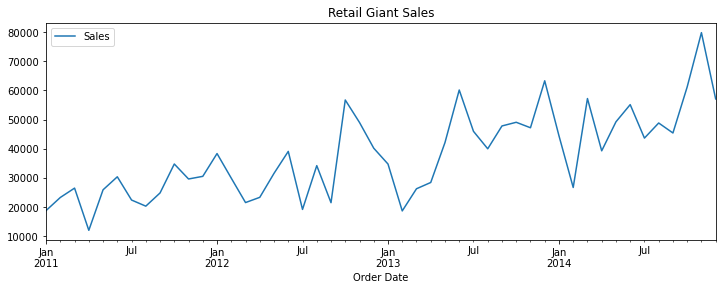

In [18]:
data1.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales')
plt.show(block=False)

## Time series Decomposition

#### Now Decomposition will be done to know the components such as Trend and Seasonality Better

### Additive seasonal decomposition

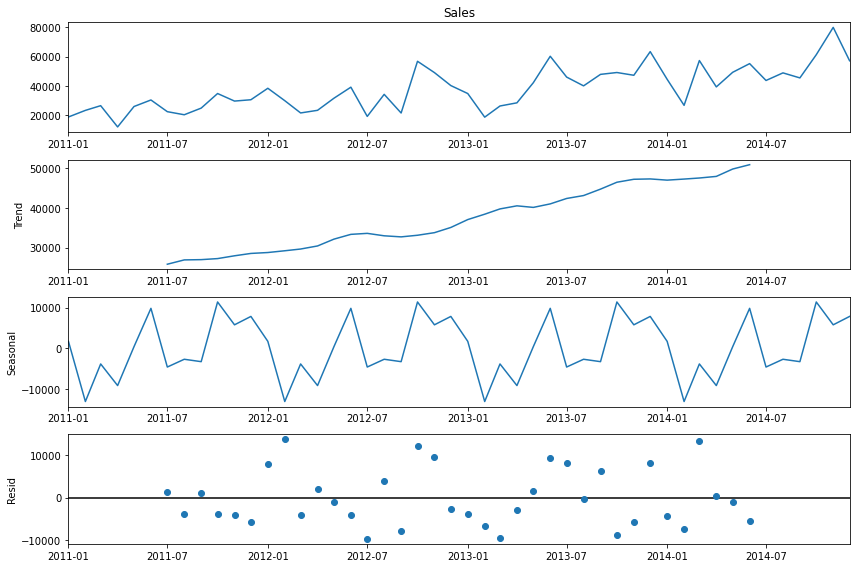

In [19]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data1.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

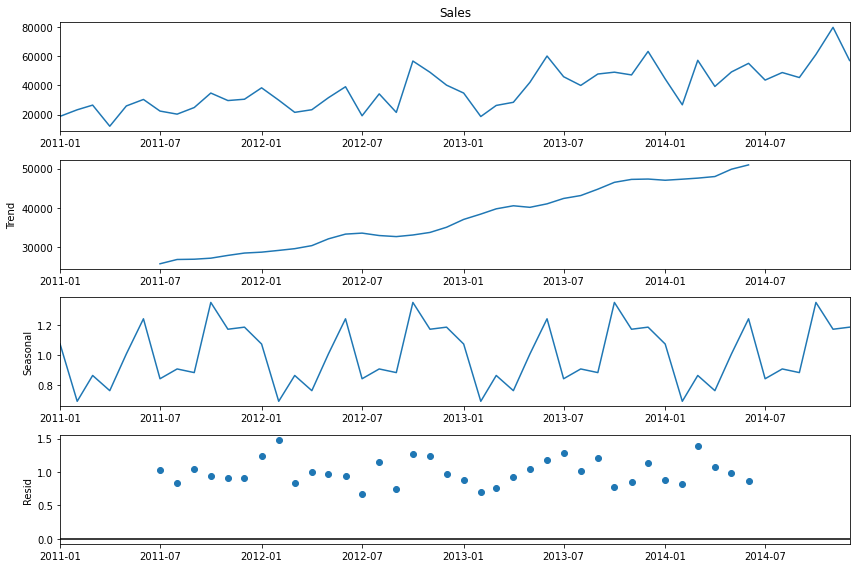

In [20]:
decomposition = sm.tsa.seasonal_decompose(data1.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

# Build and evaluate time series forecast

## Split time series data into training and test set

In [21]:
train_len = 42
train = data1[0:train_len] # first 42 months as training set
test = data1[train_len:]

In [22]:
data1.shape

(48, 1)

In [23]:
train.shape

(42, 1)

In [24]:
test.shape

(6, 1)

# Exponential smoothing methods

## Simple exponential smoothing

In [25]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

In [26]:
y_hat_ses

,Sales,ses_forecast
Order Date,,
2014-07-01,43672.0749,47448.096529
2014-08-01,48848.3409,47448.096529
2014-09-01,45424.3119,47448.096529
2014-10-01,61221.9792,47448.096529
2014-11-01,79834.4295,47448.096529
2014-12-01,57099.9858,47448.096529


### Plot train, test and forecast

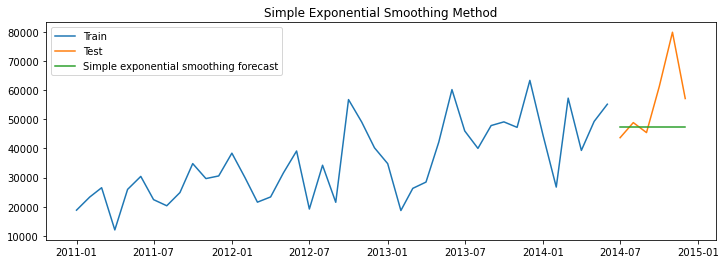

In [27]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [28]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = tempResults[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99


Here, In Simple Exponential Smoothing Method, we get the MAPE value 15.99 so our accuracy will be 84.01%.

## Holt's Exponential Smoothing

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 18821.989799999996, 'initial_slope': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

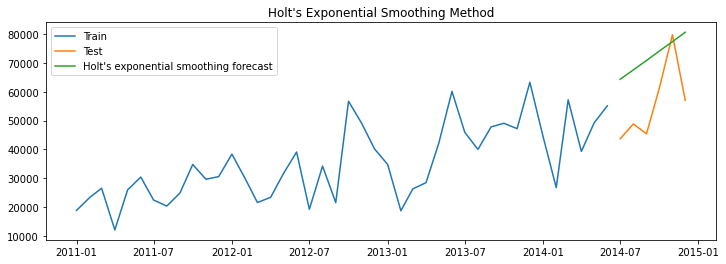

In [30]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [31]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57


In Holt's exponential smoothing method, both RMSE and MAPE is higher than Simple exponential smoothing forecast which is not good.
**Lower the RMSE and MAPE, Better the model is.**

## Holt Winters' Exponential Smoothing - Additive

In [32]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.0010509388141032566, 'smoothing_slope': 0.0010509370471667254, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 29624.549305629498, 'initial_slope': 726.1284148593357, 'initial_seasons': array([-10914.24574131, -18060.72464413, -11449.93813176, -20493.07274934,
        -9073.31688794,  -1568.37326276, -13896.80392851, -13464.39086896,
       -12517.80722356,    690.05605158,  -4713.05363924,  -3071.06327142]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Shaluka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


### Plot train, test and forecast

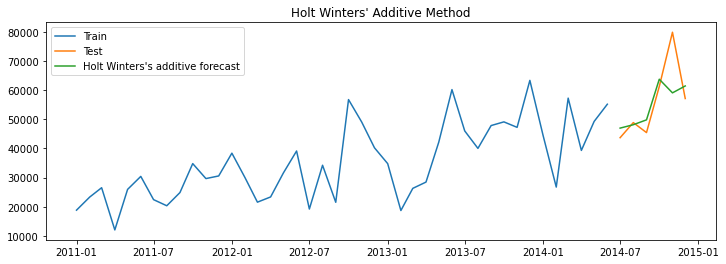

In [33]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [34]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' Exponential Smoothing additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' Exponential Smoothing additive m...,9012.78,9.39


Here, both RMSE and MAPE is very low. So, we can consider this model. But let's first check other method also.

## Holt Winters' Exponential Smoothing - Multiplicative

In [35]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 9.582290725204863e-05, 'smoothing_slope': 9.582087430729273e-05, 'smoothing_seasonal': 0.0002891739565279278, 'damping_slope': nan, 'initial_level': 34110.96530959016, 'initial_slope': 730.416973137932, 'initial_seasons': array([0.71599532, 0.48679565, 0.68350968, 0.53337241, 0.73927219,
       0.90249673, 0.62362308, 0.656219  , 0.6490747 , 0.93258796,
       0.82846243, 0.88581098]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Shaluka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


### Plot train, test and forecast

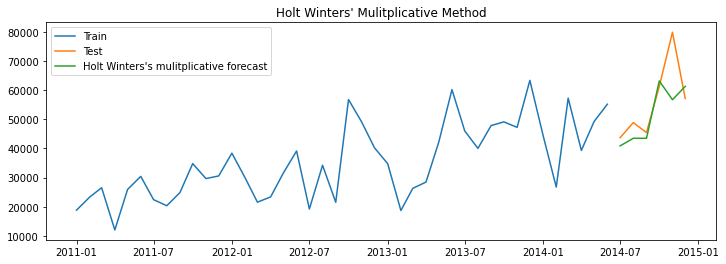

In [36]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [37]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' Exponential Smoothing multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' Exponential Smoothing additive m...,9012.78,9.39
0,Holt Winters' Exponential Smoothing multiplica...,9975.05,10.20


Again, the RMSE and MAPE values start increasing for Holt Winters' Exponential Smoothing multiplication.

### Conclusion from Exponential Smoothing Techniques

**From all the above 4 methods, considering the RMSE and MAPE  we conclude that Holt Winter's Exponential Smoothing Additive method is best as it has lowest RMSE and MAPE values**

# Auto Regressive methods

## Stationarity vs non-stationary time series

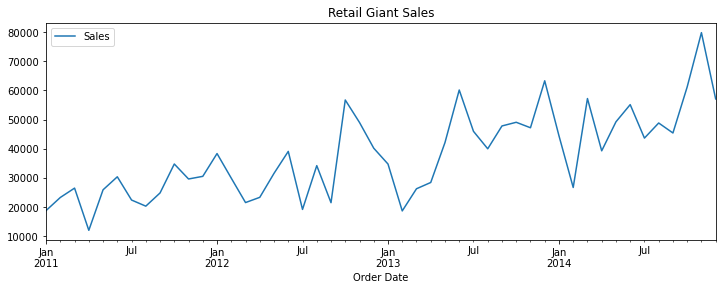

In [38]:
data1['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales')
plt.show(block=False)

By Visualization, we can say that the series is non-stationary. But we will apply some test for the confirmation.

### Augmented Dickey-Fuller (ADF) test

In [39]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data1['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [40]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data1['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


#### Since series is non-stationary so we will apply some tools to convert it in stationary series

### Box Cox transformation to make variance constant

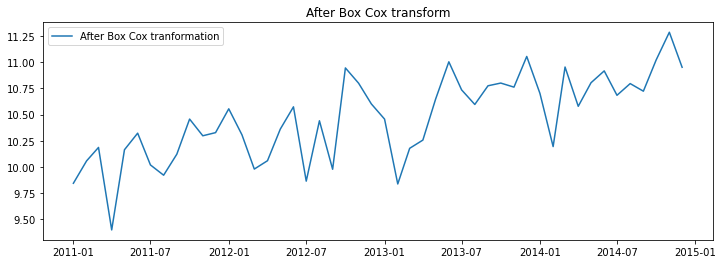

In [41]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data1['Sales'], lmbda=0), index = data1.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

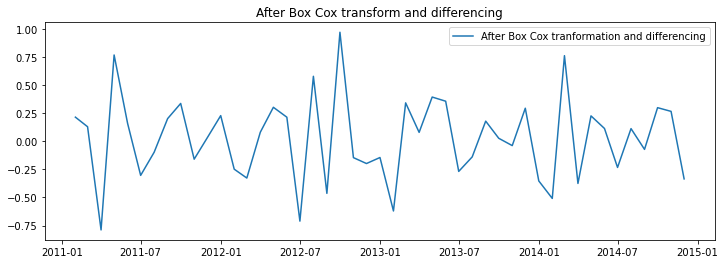

In [42]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data1.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [43]:
data_boxcox_diff.dropna(inplace=True)

In [44]:
data_boxcox_diff.shape

(47,)

#### Again we will perform the test to check the Stationarity

### Augmented Dickey-Fuller (ADF) test

In [45]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [46]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\Shaluka\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


#### Now you can see the p-values of both the test. For Series to stationary,
#### - In ADF Test, p-values should be less than 0.05
#### - In KPSS Test, p-values should be greater than 0.05

#### After converting the series in stationary, Now we will divide our data in train-test and then perform different ARIMA sets.

In [47]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [48]:
train_data_boxcox_diff.shape

(41,)

In [49]:
test_data_boxcox_diff.shape

(6,)

# Auto Regressive Models

## Auto regression method (AR)

In [50]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


### Recover original time series

In [51]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

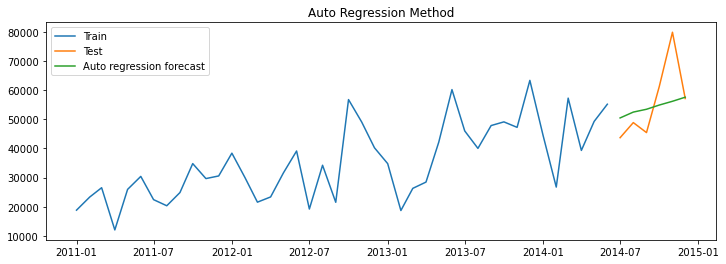

In [52]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate RMSE and MAPE

In [53]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' Exponential Smoothing additive m...,9012.78,9.39
0,Holt Winters' Exponential Smoothing multiplica...,9975.05,10.20
0,Autoregressive (AR) method,10985.28,13.56


In Simple AR Model, RMSE and MAPE results in slightly higher value

## Moving average method (MA)

In [54]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


### Recover original time series

In [55]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

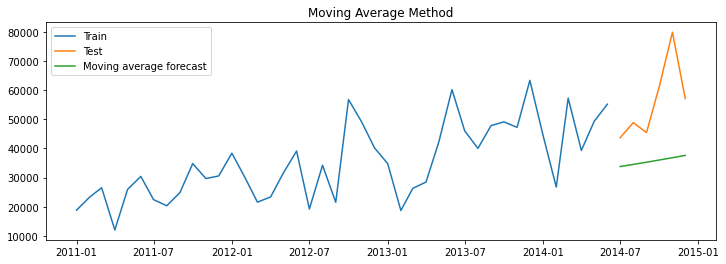

In [56]:
plt.figure(figsize=(12,4))
plt.plot(data1['Sales'][:train_len], label='Train')
plt.plot(data1['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [57]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' Exponential Smoothing additive m...,9012.78,9.39
0,Holt Winters' Exponential Smoothing multiplica...,9975.05,10.20
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


Here, both the values are very high so, definately we will not consider this model.

## Auto regression moving average method (ARMA)

In [58]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


### Recover original time series

In [59]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

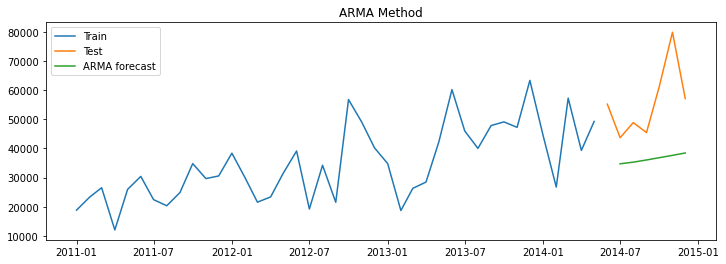

In [60]:
plt.figure(figsize=(12,4))
plt.plot( data1['Sales'][:train_len-1], label='Train')
plt.plot(data1['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate RMSE and MAPE

In [61]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' Exponential Smoothing additive m...,9012.78,9.39
0,Holt Winters' Exponential Smoothing multiplica...,9975.05,10.20
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.31,32.40


In ARMA also, both the values are high so, this model is also not good.

## Auto regressive integrated moving average (ARIMA)

In [62]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


### Recover original time series forecast

In [63]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

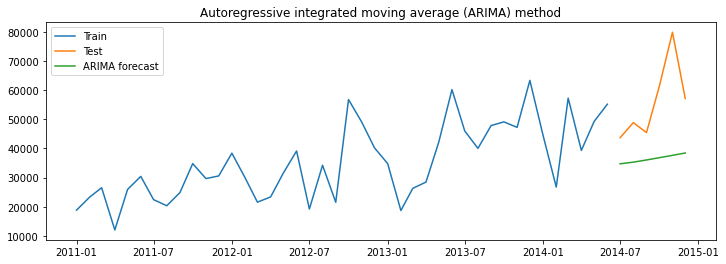

In [64]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [65]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' Exponential Smoothing additive m...,9012.78,9.39
0,Holt Winters' Exponential Smoothing multiplica...,9975.05,10.20
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.31,32.40
0,Autoregressive integrated moving average (ARIM...,22654.31,32.40


Both ARMA and ARIMA got same RMSE and MAPE values. So, both od them will not be considered.

## Seasonal auto regressive integrated moving average (SARIMA)

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.041157
ma.L1      -0.997243
ar.S.L12    0.104227
ma.S.L12   -0.973377
sigma2      0.058197
dtype: float64


### Recover original time series forecast

In [67]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

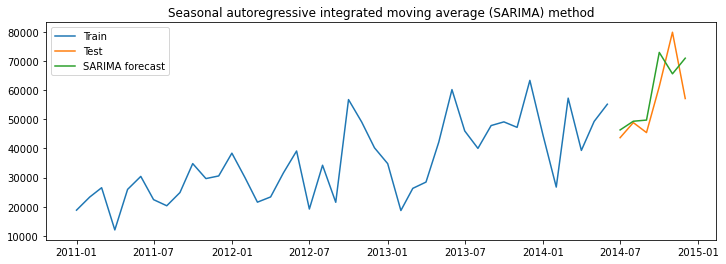

In [68]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [69]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' Exponential Smoothing additive m...,9012.78,9.39
0,Holt Winters' Exponential Smoothing multiplica...,9975.05,10.20
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.31,32.40
0,Autoregressive integrated moving average (ARIM...,22654.31,32.40
0,Seasonal autoregressive integrated moving aver...,9636.49,12.95


From all the AR Models, SARIMA has lowest RMSE and MAPE value. So, we can consider this model.

### Conclusion from ARIMA Techniques

**From the above ARIMA Techniques, we conclude that Seasonal autoregressive integrated moving average (SARIMA) method is best as it has lowest RMSE and MAPE value**